## Credit Card fraud Detection

### Task 5 Details
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Importing required libraries:

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\MJOYTHI\Downloads\Internship\Credit card frowd\creditcard.csv")

# Data Description:

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Cleaning:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.shape

(284807, 31)

In [7]:
for col in df.select_dtypes(include = np.number):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Time
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]

 ------------------------------------------------------------ 

Name of Column: V1
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]

 ------------------------------------------------------------ 

Name of Column: V2
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]

 ------------------------------------------------------------ 

Name of Column: V3
[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]

 ------------------------------------------------------------ 

Name of Column: V4
[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]

 ------------------------------------------------------------ 

Name of Column: V5
[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]

 ------------------------------------------------------------ 

Name of Column: V6
[

# Exploratory Data Analysis:

In [8]:
# For Numerical Columns:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Univarient analysis

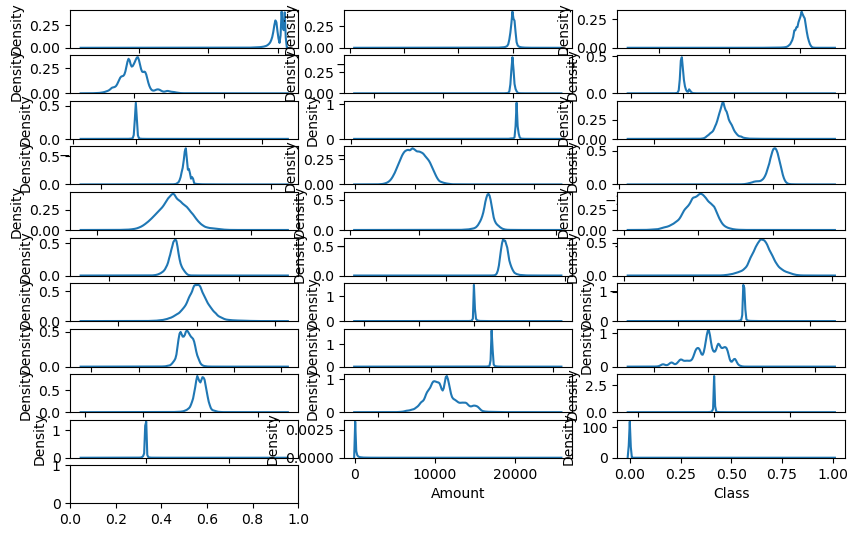

In [9]:
t=1
plt.figure(figsize=(10,7))
for i in df.select_dtypes(include=np.number):
    sns.kdeplot(x=df[i])
    plt.subplot(12,3,t)
    t+=1
plt.tight_layout()
plt.show()

In [10]:
# here we can see that the data the skewed to reduce the skeweness we can do transgormation 

# Identification of outliers

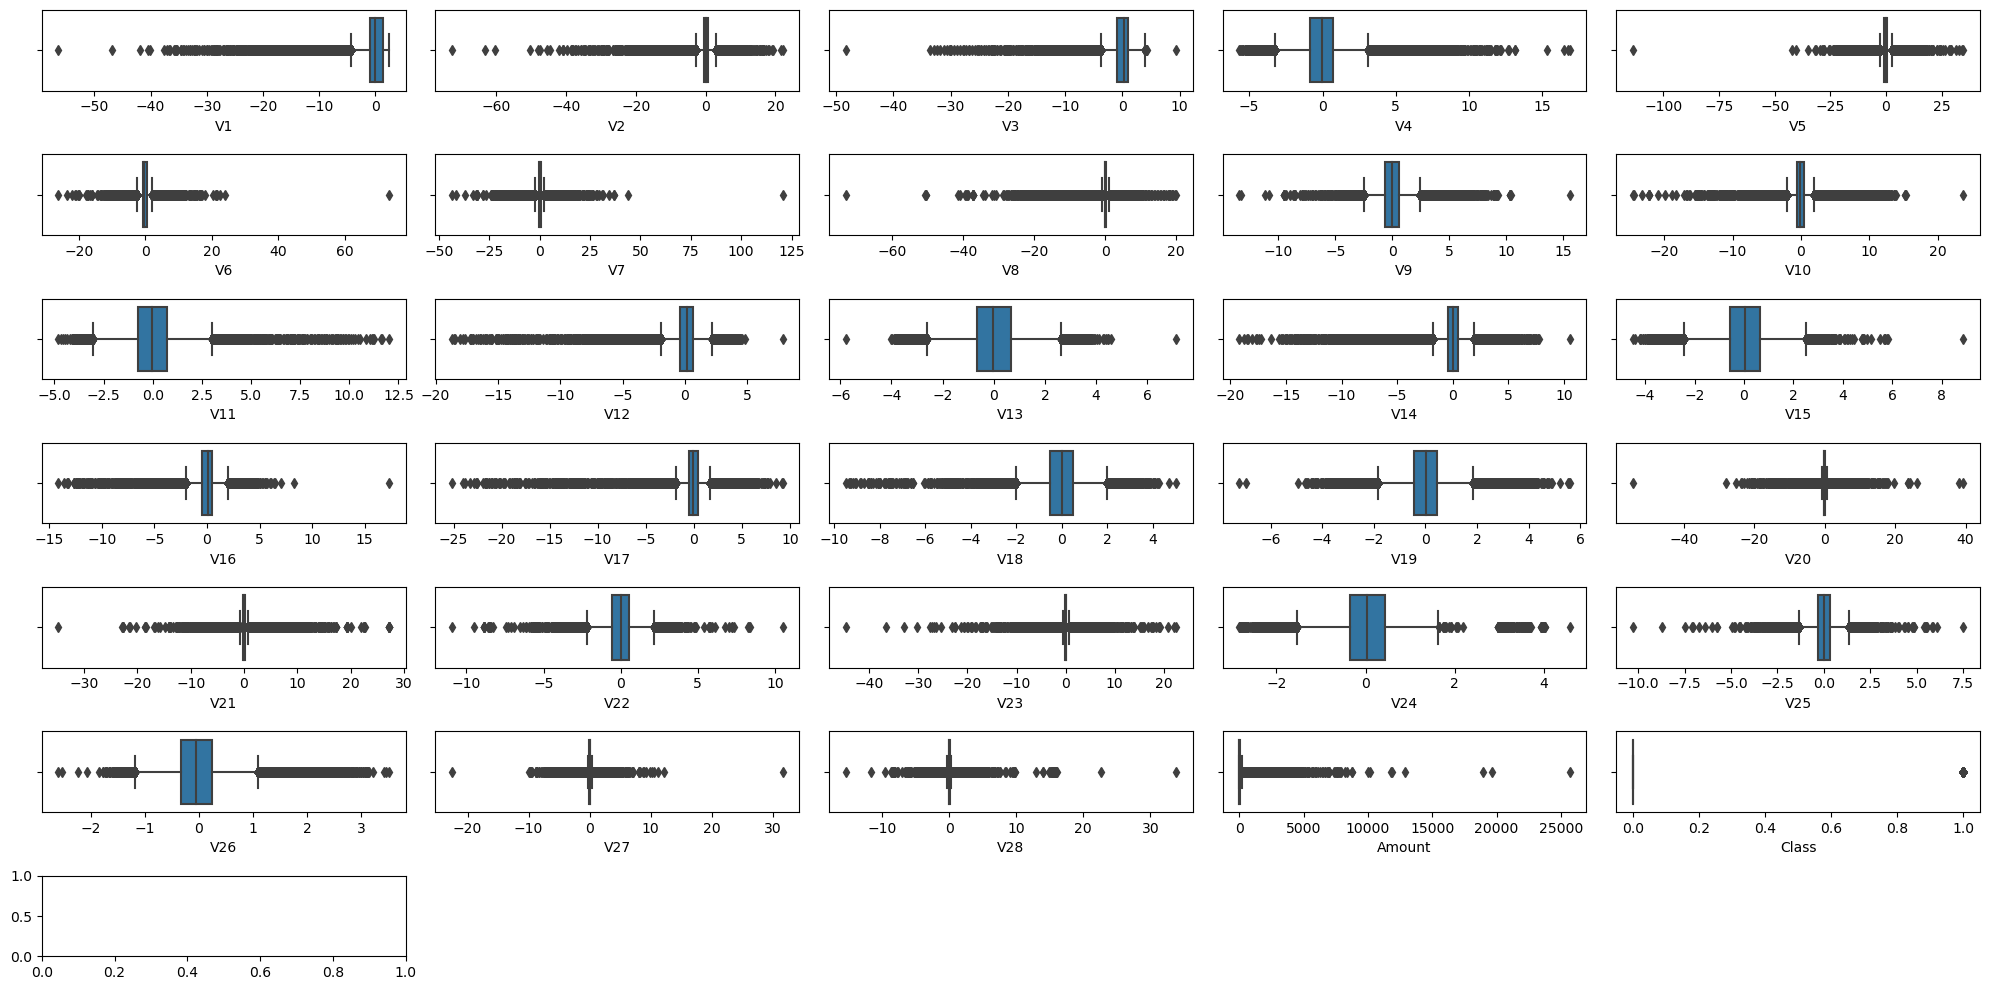

In [11]:
t=1
plt.figure(figsize=(20,10))
for i in df.select_dtypes(include=np.number):
    sns.boxplot(x=df[i])
    plt.subplot(7,5,t)
    t+=1
plt.tight_layout()
plt.show()

In [12]:
df1=df.copy()

In [13]:
df1.drop(columns="Class",inplace=True)

In [14]:
df1.shape

(284807, 30)

In [15]:
# removing outliers using a treshold

In [16]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
iqr=q3-q1
ul=1.5 * iqr + q3
ll=1.5 * iqr - q1

In [17]:
df1=df1[(~(df1>ul) | (df1<ll))]

In [18]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,NaN,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,NaN
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


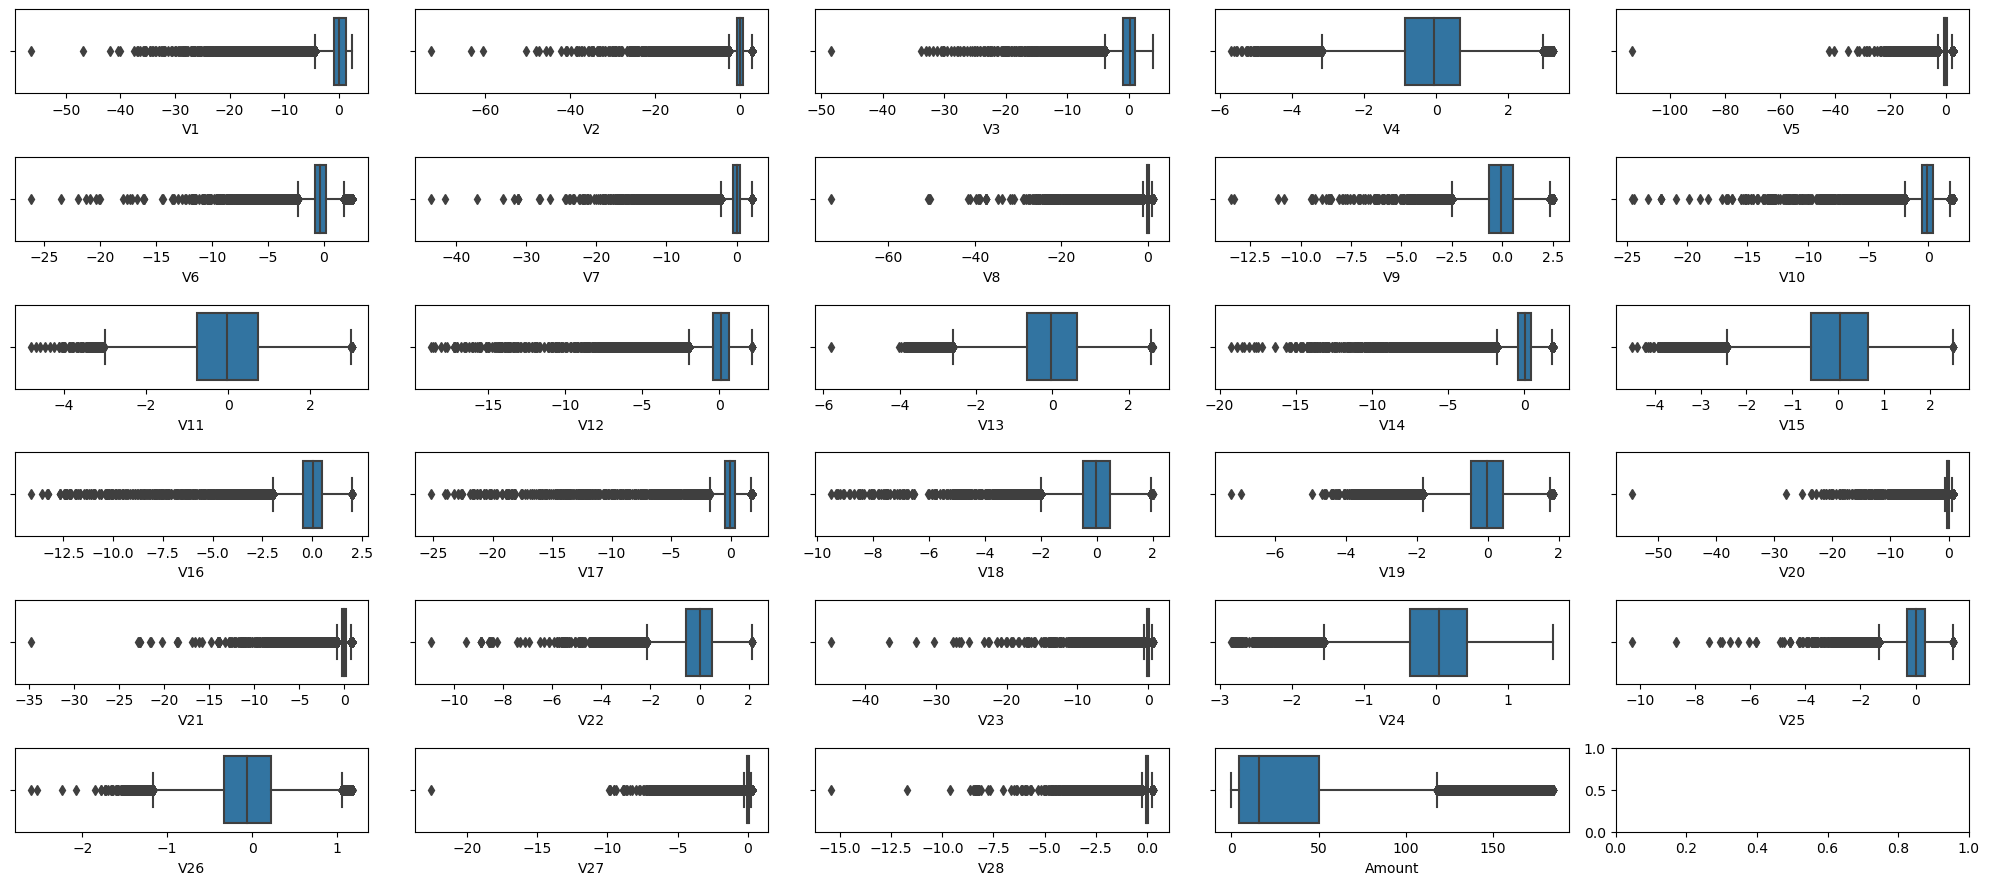

In [19]:
t=1
plt.figure(figsize=(20,10))
for i in df1.select_dtypes(include=np.number):
    sns.boxplot(x=df1[i])
    plt.subplot(7,5,t)
    t+=1
plt.tight_layout()
plt.show()

In [20]:
# here i have chossed to remove the outliers keeping the treshold as 1.5

### checking for thr distribution of tthe Traget

In [21]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

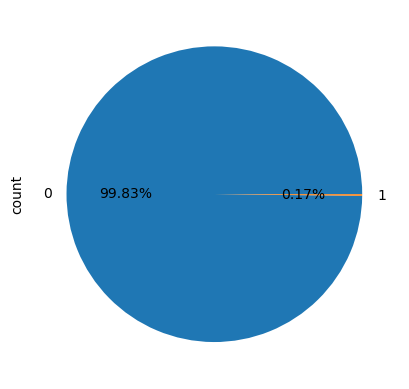

In [22]:
df["Class"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

* We can see here the target is very much imbalenced, which can be solved usinhg over sampling or under sampling of the data 

# Cheking for the skeweness of the data 

In [23]:
df1.skew()

Time      -0.035568
V1        -3.280667
V2        -6.627962
V3        -2.243565
V4        -0.122558
V5        -6.127474
V6        -1.050539
V7        -5.100682
V8       -11.953588
V9        -0.229968
V10       -2.205883
V11        0.061957
V12       -2.390526
V13       -0.086980
V14       -2.801915
V15       -0.359841
V16       -1.326803
V17       -6.217179
V18       -0.501365
V19       -0.428429
V20      -16.620041
V21      -11.453443
V22       -0.348597
V23      -20.865669
V24       -0.634919
V25       -0.714423
V26        0.326228
V27       -9.116983
V28      -10.449546
Amount     1.575008
dtype: float64

* Here we can see the data is very much skewed to reduce the skewness of the data we can use Transformation techinque

* Transformation of the data using yeo-johnson, Since some variabels are heavily skewed and yeo-johnson is good at handelling both positive as well as negative data 

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
pw=PowerTransformer(method="yeo-johnson")
df_transformed=pd.DataFrame(pw.fit_transform(df1),columns=df1.columns)

In [26]:
df_trans=pd.concat([df["Class"],df_transformed],axis=1)
df_trans

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-2.434947,-0.904815,-0.209139,2.179794,1.251496,-0.313694,0.804560,0.186721,0.021823,...,1.075134,-0.059669,0.363147,-0.411923,-0.008333,0.204846,-0.330082,0.907945,-0.257108,1.687680
1,0,-2.434947,0.626390,0.091827,-0.035412,0.455873,0.037941,0.182300,-0.184342,-0.005261,...,-0.097184,-0.623346,-0.894260,0.394702,-0.662177,0.287672,0.366337,-0.087051,0.012659,-1.077119
2,0,-2.434688,-0.904242,-1.029952,1.383208,0.398342,-0.449460,2.386644,0.950427,0.343469,...,2.426445,0.885440,1.096413,NaN,-1.141981,-0.687607,-0.214707,-0.340369,-0.516664,NaN
3,0,-2.434688,-0.742857,-0.298271,1.403001,-0.616570,-0.027028,1.725255,0.184234,0.661135,...,-0.484644,-0.319794,-0.025512,-0.658793,-1.727613,1.405334,-0.406706,0.369622,0.414120,1.529365
4,0,-2.434458,-0.823641,0.750192,1.162053,0.417891,-0.370997,0.384014,0.659451,-0.592341,...,1.810521,-0.032516,1.136814,-0.498282,0.126141,-0.463767,1.115758,1.690596,2.198589,1.073355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,1.535206,-3.432267,NaN,-4.215027,-1.560427,-3.466076,-2.539937,-3.278129,NaN,...,NaN,0.747375,0.124910,NaN,-0.902414,NaN,0.622028,NaN,NaN,-1.551879
284803,0,1.535224,-0.639272,-0.194659,1.648983,-0.517062,0.868678,1.501704,-0.070261,0.454935,...,0.322257,0.750327,1.329482,0.025752,-1.544312,-1.171444,-0.823162,0.409957,-0.476975,0.291255
284804,0,1.535242,1.309171,-0.385602,-1.857859,-0.372092,3.064276,NaN,-0.408474,1.632453,...,0.124301,0.821097,0.805218,-0.161579,1.146970,0.504082,-0.097244,-0.007784,-0.295980,1.049318
284805,0,1.535242,-0.395844,0.359371,0.391315,0.660388,-0.346783,0.991810,-0.765268,1.537117,...,0.570635,0.956126,1.139506,-0.578121,0.093020,-1.108589,1.199503,0.709501,0.838101,-0.329180


In [27]:
df_trans.skew()

Class     23.997579
Time      -0.229688
V1        -0.218003
V2         0.016339
V3        -0.083395
V4         0.008016
V5        -0.301771
V6        -0.586022
V7        -0.034525
V8         0.244667
V9        -0.046398
V10       -0.298444
V11       -0.000516
V12        0.031316
V13       -0.007196
V14        0.010307
V15       -0.010280
V16       -0.019436
V17       -0.345067
V18       -0.049972
V19       -0.007911
V20        0.237445
V21        0.178182
V22       -0.070729
V23        0.189563
V24       -0.019567
V25       -0.014012
V26       -0.021932
V27        0.187164
V28        0.174484
Amount    -0.031771
dtype: float64

In [28]:
df_trans.isna().sum()/len(df_trans)

Class     0.000000
Time      0.000000
V1        0.000000
V2        0.017893
V3        0.000070
V4        0.029483
V5        0.026151
V6        0.066947
V7        0.014529
V8        0.041772
V9        0.019181
V10       0.020263
V11       0.002251
V12       0.002700
V13       0.007826
V14       0.018932
V15       0.001506
V16       0.005839
V17       0.020481
V18       0.012454
V19       0.018054
V20       0.058608
V21       0.026622
V22       0.001310
V23       0.035301
V24       0.000478
V25       0.005895
V26       0.008880
V27       0.068885
V28       0.041432
Amount    0.112020
dtype: float64

In [29]:
df_trans=df_trans.dropna()

* we can see after transforming the data the skewness is reduced

# Model before performing Oversampling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
x=df_trans.drop(columns="Class")
y=df_trans["Class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [32]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
ypred=model.predict(x_test)

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54390
           1       1.00      0.09      0.17        11

    accuracy                           1.00     54401
   macro avg       1.00      0.55      0.58     54401
weighted avg       1.00      1.00      1.00     54401



# Over sampling using SMOTE technique

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_new,y_new=sm.fit_resample(x,y)

In [34]:
y_new.value_counts()

Class
0    181298
1    181298
Name: count, dtype: int64

# Model after performing Oversampling

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,train_size=0.7,random_state=100)

In [36]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
ypred=model.predict(x_test)

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54405
           1       0.93      0.95      0.94     54374

    accuracy                           0.94    108779
   macro avg       0.94      0.94      0.94    108779
weighted avg       0.94      0.94      0.94    108779



# DecisionTree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt= DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
pred=model.predict(x_test)

In [39]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54405
           1       0.93      0.95      0.94     54374

    accuracy                           0.94    108779
   macro avg       0.94      0.94      0.94    108779
weighted avg       0.94      0.94      0.94    108779



# Hyper tuning Parameters

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [43]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [44]:
dt= DecisionTreeClassifier(**grid_search.best_params_)
model=dt.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54405
           1       0.93      0.95      0.94     54374

    accuracy                           0.94    108779
   macro avg       0.94      0.94      0.94    108779
weighted avg       0.94      0.94      0.94    108779



In [46]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

# AdaBoost Model

In [47]:
ad=AdaBoostClassifier()
model=ad.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54405
           1       0.93      0.95      0.94     54374

    accuracy                           0.94    108779
   macro avg       0.94      0.94      0.94    108779
weighted avg       0.94      0.94      0.94    108779



# GradientBoosting Model

In [48]:
gbc=GradientBoostingClassifier()
model=gbc.fit(x_train,y_train)
pred=model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     54405
           1       0.93      0.95      0.94     54374

    accuracy                           0.94    108779
   macro avg       0.94      0.94      0.94    108779
weighted avg       0.94      0.94      0.94    108779



# Conclution 

In [ ]:
#This is a classical classification problem with a imbalanced dataset. F1 score would be the right metric for evaluation 
# The overall F1-score is coming to 94%. 
# I tried building some other model but all the models are giving accuracy score of 0.94
# Oversampling the minority class has given the best predicting bpthe chategories of the target 
# The key risk in this above method is oversampling as it makes the model to overfit 